# ECS759P Lab6 Part 3: Neural networks for Classification

## Data
We are going to use in this lab the MNIST dataset containing images (28x28 pixels) of hand written digits. `PyTorch` provides an API to get the data:

In [ ]:
import torch
import torch.nn as nn
from torchvision import datasets, transforms
import numpy as np
import matplotlib.pyplot as plt

train_dataset = datasets.MNIST('./data', train=True, download=True, transform=transforms.ToTensor())
validation_dataset = datasets.MNIST('./data', train=False, transform=transforms.ToTensor())

Now that the data downloaded, let's create a data loader which will allow you to access images and their corresponding labels:


In [ ]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=35, shuffle=True)

validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset, batch_size=35, shuffle=False)

Let's now have a look at the data we are dealing with as well as its dimension (you can run the cell several times to see what happens):

torch.Size([1, 28, 28])
Label is: 2
Dimension of input data: torch.Size([35, 1, 28, 28])
Dimension of labels: torch.Size([35])


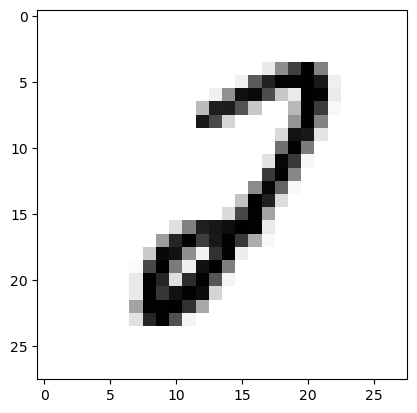

In [ ]:
input_data, label = next(iter(train_loader))
plt.imshow(input_data[0,:,:,:].numpy().reshape(28,28), cmap="gray_r");
print(input_data[0,:,:,:].shape)
print("Label is: {}".format(label[0]))
print("Dimension of input data: {}".format(input_data.size()))
print("Dimension of labels: {}".format(label.size()))

Data loaders add additional functionalities (like picking batches, shuffling, etc).

There are many pre-made data loaders like MNIST, but there is also a possibility of creating custom dataloaders.

## Deep Network

**Q. By filling the gaps below, implement a Multi-layer Neural Network with several hidden layers (number to explore as a hyperparameter). Initially, we are only interested in using the sigmoid activation function and the `SGD` optimiser. Test your networks using the provided data loader and compute the accuracy on the validation set. What is the impact of the different hyperparameters: number of epochs, learning rate $\eta$, initial weights and number of neurons of the hidden layers, number of hidden layers?**

In [ ]:
# Definition of the neural network
class MyMLP(nn.Module):
  def __init__(self):
    super(MyMLP, self).__init__()
    # TO DO

  def forward(self, x):
    # TO DO: (35, 1, 28, 28) => (35, 28*28)

    return x


def evaluation(dataloader):
  total, correct = 0,0
  net.eval()
  # TO DO

  return

def weights_init(layer):
    if isinstance(layer, nn.Linear):
      # TO DO


device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

net = MyMLP().to(device)
net.apply(weights_init)
loss_fn = nn.CrossEntropyLoss()
# SGD optimizer with learning rate of 0.1
opt = torch.optim.SGD(list(net.parameters()), lr = 0.1)

# Training phase

# Change this value to make training longer
max_epochs = 5
loss_epoch_array = []
loss_epoch = 0
train_accuracy = []
valid_accuracy = []
for epoch in range(max_epochs):
  loss_epoch = 0
  print(epoch)
  for i, data in enumerate(train_loader, 0):
    # TO DO

  loss_epoch_array.append(loss_epoch)
  train_accuracy.append(evaluation(train_loader))
  valid_accuracy.append(evaluation(validation_loader))
  print("Epoch {}: loss: {}, train accuracy: {}, valid accuracy:{}".format(epoch + 1, loss_epoch_array[-1], train_accuracy[-1], valid_accuracy[-1]))

cuda:0
0
Epoch 1: loss: 2671.5610011320678, train accuracy: 88.18, valid accuracy:87.33
1
Epoch 2: loss: 1088.8946161717176, train accuracy: 91.04, valid accuracy:89.53
2
Epoch 3: loss: 788.783763100219, train accuracy: 92.54833333333333, valid accuracy:90.66
3
Epoch 4: loss: 626.5019354498945, train accuracy: 92.62833333333333, valid accuracy:90.42
4
Epoch 5: loss: 512.4583809502074, train accuracy: 94.405, valid accuracy:91.75


**Q. Test other activation functions in your Deep Network, especially  `ReLU()`. Briefly explain what effect you observe on the performance.**

**Q. Use other optimizers such as `SGD with momentum` and `Adam`. What do you observe during the learning phase?**

**Q. When dealing with images, we usually prefer using Convolutional Neural Networks (CNN). By filling the gaps below, implement the LeNet-5 architecture (see lenet-5.png attached to the lab) using `PyTorch`. Do you see any improvement in terms of performance?**

In [ ]:
# CNN implementation

class MyCNN(nn.Module):
  def __init__(self):
    super(MyCNN, self).__init__()
    # TO DO

  def forward(self, x):
    # TO DO


device = torch.device("cuda:0")

net = MyCNN().to(device)
loss_fn = nn.CrossEntropyLoss()
opt = torch.optim.Adam(list(net.parameters()))

def evaluation(dataloader):
  total, correct = 0,0
  net.eval()
  for data in dataloader:
    # TO DO
  return accuracy

loss_epoch_array = []
max_epochs = 50
loss_epoch = 0
train_accuracy = []
valid_accuracy = []
for epoch in range(max_epochs):
  loss_epoch = 0
  for i, data in enumerate(train_loader, 0):
    # TO DO
  loss_epoch_array.append(loss_epoch)
  train_accuracy.append(evaluation(train_loader))
  valid_accuracy.append(evaluation(validation_loader))
  print("Epoch {}: loss: {}, train accuracy: {}, valid accuracy:{}".format(epoch + 1, loss_epoch_array[-1], train_accuracy[-1], valid_accuracy[-1]))